In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

path = 'Datasets/test_2'
size = len(os.listdir(path))
IMG_SHAPE = 80 

image_generator = ImageDataGenerator(rescale=1./255)
data_gen = image_generator.flow_from_directory(batch_size=size, directory=path,
                                                  shuffle=False,
                                                  target_size=(IMG_SHAPE,IMG_SHAPE))
print(data_gen.class_indices)

Found 1 images belonging to 1 classes.
{'class': 0}


In [33]:
test_image, test_label = next(data_gen)
class_names = np.array(['Pumba', 'Timon'])

model = keras.models.load_model('BinaryClassifier_model_92.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 76, 76, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 512)         1

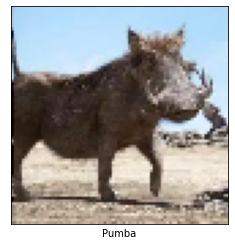

In [34]:
predictions = model.predict(test_image) #Предсказания

plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_image[0], cmap=plt.cm.binary)
plt.xlabel(class_names[np.argmax(predictions[0])])
plt.show()